In [1]:
import requests
import pandas as pd
import numpy as np

In [2]:
url = 'https://fantasy.premierleague.com/api/bootstrap-static/'

In [3]:
r = requests.get(url)

In [4]:
json = r.json()

In [5]:
json.keys()

dict_keys(['events', 'game_settings', 'phases', 'teams', 'total_players', 'elements', 'element_stats', 'element_types'])

In [6]:
elements_df = pd.DataFrame(json['elements'])
elements_types_df = pd.DataFrame(json['element_types'])
teams_df = pd.DataFrame(json['teams'])

In [7]:
elements_df.head()

,assists,bonus,bps,chance_of_playing_next_round,chance_of_playing_this_round,clean_sheets,code,corners_and_indirect_freekicks_order,corners_and_indirect_freekicks_text,cost_change_event,...,threat_rank_type,total_points,transfers_in,transfers_in_event,transfers_out,transfers_out_event,value_form,value_season,web_name,yellow_cards
0,0,0,0,0.0,0.0,0,37605,NaN,,0,...,238,0,3311,7,50125,972,0.0,0.0,Özil,0
1,0,0,0,0.0,0.0,0,39476,NaN,,0,...,203,0,10212,7,18269,181,0.0,0.0,Sokratis,0
2,0,0,51,100.0,100.0,0,41270,NaN,,0,...,70,7,33395,1965,67456,2340,0.1,1.3,David Luiz,0
3,1,1,111,100.0,100.0,2,54694,NaN,,0,...,25,30,417411,9270,2643898,69146,0.3,2.6,Aubameyang,2
4,0,0,0,100.0,100.0,0,58822,NaN,,0,...,193,0,2925,113,31240,486,0.0,0.0,Cédric,0


In [8]:
slim_elements_df = elements_df[['second_name','team','element_type','selected_by_percent','now_cost','minutes','transfers_in','value_season','total_points']]

In [9]:
slim_elements_df.head(1)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points
0,Özil,1,3,0.6,68,0,3311,0.0,0


In [10]:
slim_elements_df['position'] = slim_elements_df.element_type.map(elements_types_df.set_index('id').singular_name)

C:\Users\simra\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [11]:
slim_elements_df.head(1)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position
0,Özil,1,3,0.6,68,0,3311,0.0,0,Midfielder


In [12]:
slim_elements_df['team'] = slim_elements_df.team.map(teams_df.set_index('id').name)

C:\Users\simra\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [13]:
slim_elements_df.head(1)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position
0,Özil,Arsenal,3,0.6,68,0,3311,0.0,0,Midfielder


In [14]:
slim_elements_df['value'] = slim_elements_df.value_season.astype(float)

C:\Users\simra\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [15]:
slim_elements_df.sort_values('value',ascending=False).head(20)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
283,Bamford,Leeds,4,34.9,61,670,2795735,9.5,58,Forward,9.5
132,Zouma,Chelsea,2,16.4,54,630,1205169,8.9,48,Defender,8.9
463,Vestergaard,Southampton,2,8.4,47,585,590985,8.5,40,Defender,8.5
33,Martínez,Aston Villa,1,27.0,48,630,1753071,8.3,40,Goalkeeper,8.3
425,Wilson,Newcastle,4,14.5,66,697,1340670,8.3,55,Forward,8.3
546,Fabianski,West Ham,1,2.4,50,720,94182,8.2,41,Goalkeeper,8.2
43,Grealish,Aston Villa,3,35.3,75,630,2328852,8.0,60,Midfielder,8.0
47,Mings,Aston Villa,2,11.9,53,630,856288,7.9,42,Defender,7.9
489,Son,Spurs,3,58.5,96,640,4450768,7.7,74,Midfielder,7.7
61,Watkins,Aston Villa,4,7.0,61,630,677916,7.7,47,Forward,7.7


In [16]:
slim_elements_df = slim_elements_df.loc[slim_elements_df.value > 0]

In [17]:
pivot=slim_elements_df.pivot_table(index='position',values='value',aggfunc=np.mean).reset_index()

In [18]:
pivot.sort_values('value',ascending=False)

,position,value
2,Goalkeeper,4.219231
0,Defender,2.862759
1,Forward,2.733929
3,Midfielder,2.554144


In [19]:
team_pivot = slim_elements_df.pivot_table(index='team',values='value',aggfunc=np.mean).reset_index()

In [20]:
team_pivot.sort_values('value',ascending=False)

,team,value
1,Aston Villa,4.150000
15,Southampton,3.830000
19,Wolves,3.580000
4,Chelsea,3.555000
18,West Ham,3.419048
8,Leeds,3.268421
9,Leicester,3.018182
0,Arsenal,2.942105
5,Crystal Palace,2.915000
2,Brighton,2.910000


In [21]:
fwd_df = slim_elements_df.loc[slim_elements_df.position == 'Forward']
mid_df = slim_elements_df.loc[slim_elements_df.position == 'Midfielder']
def_df = slim_elements_df.loc[slim_elements_df.position == 'Defender']
goal_df = slim_elements_df.loc[slim_elements_df.position == 'Goalkeeper']

In [22]:
goal_df.value.hist()

In [23]:
goal_df.sort_values('value',ascending=False).head(10)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
33,Martínez,Aston Villa,1,27.0,48,630,1753071,8.3,40,Goalkeeper,8.3
546,Fabianski,West Ham,1,2.4,50,720,94182,8.2,41,Goalkeeper,8.2
572,dos Santos Patrício,Wolves,1,7.5,55,720,288472,7.3,40,Goalkeeper,7.3
457,McCarthy,Southampton,1,20.0,45,720,581669,7.3,33,Goalkeeper,7.3
402,Darlow,Newcastle,1,1.8,50,720,152111,7.0,35,Goalkeeper,7.0
246,Schmeichel,Leicester,1,11.7,55,720,235826,6.2,34,Goalkeeper,6.2
525,Johnstone,West Brom,1,1.0,45,720,57192,5.8,26,Goalkeeper,5.8
294,Meslier,Leeds,1,4.1,45,720,294936,5.8,26,Goalkeeper,5.8
7,Leno,Arsenal,1,9.1,50,720,374286,5.6,28,Goalkeeper,5.6
112,Pope,Burnley,1,10.8,54,630,148047,5.4,29,Goalkeeper,5.4


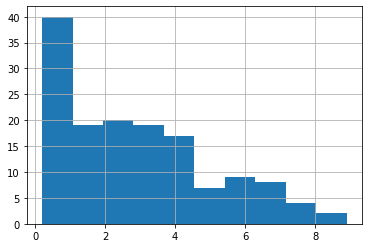

In [24]:
def_df.value.hist()

In [25]:
def_df.sort_values('value',ascending=False).head(10)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
132,Zouma,Chelsea,2,16.4,54,630,1205169,8.9,48,Defender,8.9
463,Vestergaard,Southampton,2,8.4,47,585,590985,8.5,40,Defender,8.5
47,Mings,Aston Villa,2,11.9,53,630,856288,7.9,42,Defender,7.9
550,Cresswell,West Ham,2,8.3,51,720,634067,7.5,38,Defender,7.5
52,Konsa Ngoyo,Aston Villa,2,7.6,47,630,697772,7.4,35,Defender,7.4
577,Saïss,Wolves,2,18.1,52,517,1679359,7.3,38,Defender,7.3
267,Justin,Leicester,2,21.9,48,720,1281989,7.1,34,Defender,7.1
585,Kilman,Wolves,2,14.5,43,450,1031439,7.0,30,Defender,7.0
146,Chilwell,Chelsea,2,28.4,60,450,2114845,6.8,41,Defender,6.8
10,Bellerín,Arsenal,2,8.2,51,720,482670,6.7,34,Defender,6.7


In [26]:
mid_df.sort_values('value',ascending=False).head(10)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
43,Grealish,Aston Villa,3,35.3,75,630,2328852,8.0,60,Midfielder,8.0
489,Son,Spurs,3,58.5,96,640,4450768,7.7,74,Midfielder,7.7
168,Zaha,Crystal Palace,3,29.4,74,720,2337224,7.3,54,Midfielder,7.3
464,Ward-Prowse,Southampton,3,7.6,60,720,507066,7.2,43,Midfielder,7.2
129,Frello Filho,Chelsea,3,11.2,52,455,1178560,7.1,37,Midfielder,7.1
564,Fornals,West Ham,3,1.8,64,660,150530,6.6,42,Midfielder,6.6
279,Klich,Leeds,3,6.1,56,696,718329,6.4,36,Midfielder,6.4
44,McGinn,Aston Villa,3,2.4,55,630,235672,6.2,34,Midfielder,6.2
286,Sousa de Azevedo e Costa,Leeds,3,8.0,56,622,1028721,5.9,33,Midfielder,5.9
589,Lomba Neto,Wolves,3,1.8,55,646,188600,5.8,32,Midfielder,5.8


In [27]:
fwd_df.sort_values('value',ascending=False).head(10)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
283,Bamford,Leeds,4,34.9,61,670,2795735,9.5,58,Forward,9.5
425,Wilson,Newcastle,4,14.5,66,697,1340670,8.3,55,Forward,8.3
61,Watkins,Aston Villa,4,7.0,61,630,677916,7.7,47,Forward,7.7
197,Calvert-Lewin,Everton,4,57.1,78,698,3892500,7.3,57,Forward,7.3
487,Kane,Spurs,4,45.4,110,713,2636128,7.3,80,Forward,7.3
470,Adams,Southampton,4,4.4,59,675,308001,6.9,41,Forward,6.9
253,Vardy,Leicester,4,21.4,101,558,1428994,5.8,59,Forward,5.8
77,Maupay,Brighton,4,4.4,65,630,599851,5.8,38,Forward,5.8
460,Ings,Southampton,4,8.2,83,624,700792,5.7,47,Forward,5.7
225,Mitrović,Fulham,4,7.2,57,657,470618,4.9,28,Forward,4.9


In [29]:
fwd_df.to_excel('FWD_DF.xlsx')

In [30]:
mid_df.to_excel('MID_DF.xlsx')

In [31]:
def_df.to_excel('DEF_DF.xlsx')

In [32]:
goal_df.to_excel('GOAL_DF.xlsx')